 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_en_meses.xlsx')

In [3]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_meses,monto_miles,comuna
0,0,Finalizada,Escuelas,29,67065.700,12
1,1,Finalizada,Espacio Público,16,9950.017,12
2,2,Finalizada,Espacio Público,22,36942.632,1
3,3,Finalizada,Espacio Público,28,26938.294,1
4,4,Finalizada,Vivienda,12,6990.315,8


Asignaremos como valores NaN a las obras que se encuentren en ejecución o en licitación. De esta forma será más fácil eliminarlas luego. Nos quedamos únicamente con aquellas que hayan sido finalizadas y tengamos el dato del plazo en meses de duración de la obra

In [4]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [5]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [6]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras.iloc[:,3]
y

0      29
1      16
2      22
3      28
4      12
       ..
929     2
930     1
931     1
932     1
933     1
Name: plazo_meses, Length: 883, dtype: int64

## FEATURES

In [7]:
# El tipo de obra viene dada en formato string, utilizaremos dummies para transformarlas

tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_meses,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,29,67065.700,12,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,16,9950.017,12,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,22,36942.632,1,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,28,26938.294,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,12,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,2,2325.368,8,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,1,1984.627,8,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,1,6557.067,9,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,1,22279.428,15,0,0,1,0,0,0,0


In [8]:
# Guardamos en x todas las features excepto el plazo en meses.

x = obras.iloc[:,4:]
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


In [9]:
obras['plazo_meses'].value_counts()

2     91
3     91
1     87
4     71
6     62
5     53
7     50
12    39
10    39
8     28
9     26
18    24
16    22
17    21
13    20
15    20
11    18
14    16
20    14
19    13
21    12
23     7
27     7
26     6
24     5
28     5
29     5
22     5
30     3
31     3
37     3
33     2
42     2
32     2
55     1
52     1
46     1
45     1
57     1
40     1
38     1
35     1
34     1
25     1
86     1
Name: plazo_meses, dtype: int64

In [10]:
y.shape

(883,)

In [11]:
x.shape

(883, 9)

## PRE PROCESAMIENTO

In [12]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [13]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (618, 9)
Se corresponde con el "Y" de entrenamiento (618,)


In [14]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(xtrain)

In [15]:
xtrain_scaled = scaler.transform (xtrain)
xtest_scaled = scaler.transform (xtest)

In [16]:
xtrain_scaled.shape

(618, 9)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [17]:
# Definimos el clasificador

svc = SVC(probability=True, class_weight='balanced')

param_svc={'kernel':('linear','rbf'),
           'C':[0.001, 0.1, 1, 5, 10, 100],
           'gamma':[0.1, 1, 5, 10]}

gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             param_grid={'C': [0.001, 0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [18]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
El score obtenido fue:  0.11978756884343036


In [19]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.12 


In [20]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [21]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

In [22]:
print(classification_report(ytest, ypred_svc))

              precision    recall  f1-score   support

           1       0.45      0.31      0.37        32
           2       0.38      0.24      0.29        21
           3       0.08      0.11      0.09        19
           4       0.08      0.04      0.06        23
           5       0.32      0.35      0.33        20
           6       0.17      0.04      0.07        24
           7       0.09      0.13      0.11        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        15
          11       0.04      0.20      0.07         5
          12       0.25      0.22      0.24         9
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.25      0.14      0.18         7
          18       0.14    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier

In [23]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [24]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 20}
El score obtenido fue:  0.1488722790453711
El accuracy obtenido fue de 0.15 


In [25]:
rdos = rdos.append({'Clasificador':'KNN',
                    'Accuracy': score_knn}, ignore_index=True)

In [26]:
# Vamos a ver cómo varía el accuracy en función de los distintos K

iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [27]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

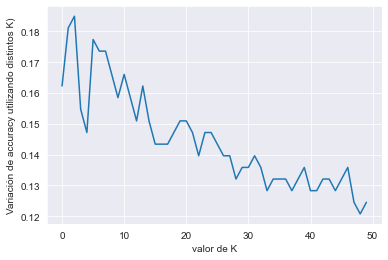

In [29]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [30]:
# Como vimos del gráfico anterior, a mayor K, el accuracy disminuye. 

rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943


### Random Forest Classifier

In [31]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[1,2,5,10,15,20,25,50,75,100]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 5, 10, 15, 20, 25, 50, 75,
                                          100]})

In [32]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 25}
El score obtenido fue:  0.1570285864148964
El accuracy obtenido fue de 0.18 


In [33]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [34]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.177358


### Logistic Regression 

In [35]:
lr = LogisticRegression()

param_lr = {'C': [1, 5, 10, 50, 70, 100, 150]}

gs_lr = GridSearchCV(lr, param_grid=param_lr, cv=5)
gs_lr.fit(xtrain_scaled,ytrain)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 50, 70, 100, 150]})

In [36]:
print ('Los mejores parámetros son: ', gs_lr.best_params_)
print ('El score obtenido fue: ', gs_lr.best_score_)
ypred_lr=gs_lr.predict(xtest_scaled)
score_lr=accuracy_score(ytest,ypred_lr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_lr)))

Los mejores parámetros son:  {'C': 150}
El score obtenido fue:  0.14083398898505112
El accuracy obtenido fue de 0.16 


In [37]:
rdos = rdos.append({'Clasificador':'LR',
                   'Accuracy': score_lr}, ignore_index=True)

In [38]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.177358
3,LR,0.162264


### One Vs Rest Classifier (SVM)

In [39]:
# Al ser un problema de clasificación multiclase, probamos con OVO y OVR

ovr = OneVsRestClassifier(SVC())
ovr.fit(xtrain_scaled,ytrain)

OneVsRestClassifier(estimator=SVC())

In [40]:
ypred_ovr = ovr.predict(xtest_scaled)
score_ovr = accuracy_score(ytest,ypred_ovr)

rdos = rdos.append({'Clasificador':'OVR',
                   'Accuracy': score_ovr}, ignore_index=True)

In [41]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.177358
3,LR,0.162264
4,OVR,0.015094


### One Vs One Classifier (SVM)

In [42]:
ovo = OneVsOneClassifier(SVC())
ovo.fit(xtrain_scaled,ytrain)

OneVsOneClassifier(estimator=SVC())

In [43]:
ypred_ovo = ovo.predict(xtest_scaled)
score_ovo = accuracy_score(ytest,ypred_ovo)
score_ovo

0.09433962264150944

In [44]:
rdos = rdos.append({'Clasificador':'OVO',
                   'Accuracy': score_ovo}, ignore_index=True)

In [45]:
rdos

,Clasificador,Accuracy
0,SVC,0.124528
1,KNN,0.150943
2,Random Forest,0.177358
3,LR,0.162264
4,OVR,0.015094
5,OVO,0.094340


## Resultados / Visualización

In [52]:
from sklearn.metrics import plot_confusion_matrix

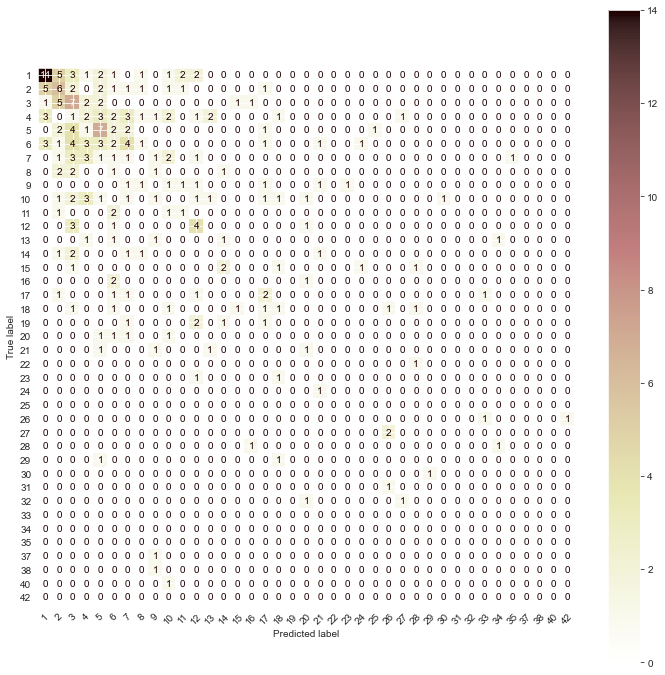

In [53]:
# Visualizamos la matriz de confusión para el mejor accuracy score (en este caso random forest)

fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs_rfr, xtest_scaled, ytest,
                            cmap=plt.cm.pink_r,
                            xticks_rotation=45, ax=ax)


In [54]:
print(classification_report(ytest, ypred_rfr))

              precision    recall  f1-score   support

           1       0.54      0.44      0.48        32
           2       0.23      0.29      0.26        21
           3       0.20      0.37      0.26        19
           4       0.12      0.09      0.10        23
           5       0.29      0.35      0.32        20
           6       0.11      0.08      0.09        24
           7       0.06      0.07      0.06        15
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        15
          11       0.20      0.20      0.20         5
          12       0.29      0.44      0.35         9
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          17       0.22      0.29      0.25         7
          18       0.17    

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusiones / Observaciones

Por cómo definimos este modelo, estamos buscando que clasifique entre +30 clases distintas, de las cuales en algunos casos solo tiene 1 sample para aprender, esto provoca que posea un accuracy muy bajo. De aquellas muestras con más samples podemos ver que en la matriz de confusión poseen el valor de true positives más elevado.